# Personal Details
Name: Aman India

Contact: 9939402131

LinkedIn: https://www.linkedin.com/in/mramanindia/

Github: https://github.com/mramanindia




## Necesario Innovations Private Limited Assignment

Real-time Mouth Recognition(if not, tell us why you can't use the live camera) using OpenCV (or specify the library you used) i.e. apply two red dots on the edge of your live mouth. Apply an effect when the mouth is opened wider than 3 cm.

# Get Started
Installing required pacakages

In [4]:
pip install onnxruntime


  Using cached onnxruntime-1.12.1-cp310-cp310-win_amd64.whl (5.8 MB)
  Using cached sympy-1.11-py3-none-any.whl (6.5 MB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
     -------------------------------------- 86.8/86.8 kB 612.4 kB/s eta 0:00:00
     -------------------------------------- 532.6/532.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 95.2/95.2 kB 1.8 MB/s eta 0:00:00


In [6]:
#Importing Required pacakages

import glob
import os
from pathlib import Path 
import datetime

import cv2
import numpy as np
import onnxruntime as rt
import tensorflow as tf

assert tf.__version__.startswith('2')


In [7]:
#Using trained deep learning model weights for this project  from "https://github.com/iglaweb/HippoYD"

CONFIDENCE_THRESHOLD = 0.4
MAX_IMAGE_WIDTH = 100
MAX_IMAGE_HEIGHT = 100
IMAGE_PAIR_SIZE = (MAX_IMAGE_WIDTH, MAX_IMAGE_HEIGHT)

url = 'https://raw.githubusercontent.com/iglaweb/HippoYD/master/out_epoch_80_lite/yawn_model_80.onnx'
destination_path = './yawn_model_80.onnx'


import urllib
urllib.request.urlretrieve(url, destination_path)

onnx_sess = rt.InferenceSession(destination_path)
input_name = onnx_sess.get_inputs()[0].name
label_name = onnx_sess.get_outputs()[0].name



def get_timestamp_ms():
    return int((datetime.datetime.utcnow() - datetime.datetime(1970, 1, 1)).total_seconds() * 1000)


def prepare_input_blob(im):
    if im.shape[0] != MAX_IMAGE_WIDTH or im.shape[1] != MAX_IMAGE_HEIGHT:
        im = cv2.resize(im, IMAGE_PAIR_SIZE)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im


def detect_image(frame, face):
    (startX, startY, endX, endY) = face

    gray_img = prepare_input_blob(frame)

    time_start = get_timestamp_ms()

    image_frame = gray_img[:, :, np.newaxis]
    image_frame = image_frame / 255.0
    image_frame = np.expand_dims(image_frame, 0).astype(np.float32)

    pred = onnx_sess.run([label_name], {input_name: image_frame})[0]

    pred = np.squeeze(pred)
    pred = round(pred[()], 2)

    time_diff = get_timestamp_ms() - time_start
    print(f'Prediction: {pred:.2f}; time: {time_diff} ms')

    return frame, pred

In [8]:
# load image from url

import urllib.request as rq


def urlToImage(url):
    # download image,convert to a NumPy array,and read it into opencv
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
    req = rq.Request(url, headers=hdr)
    resp = rq.urlopen(req)
    img = np.asarray(bytearray(resp.read()),dtype="uint8")
    img = cv2.imdecode(img,cv2.IMREAD_COLOR)
    return img


Prediction: 1.00; time: 16 ms
Mouth is opened 
Confidence: 1.0


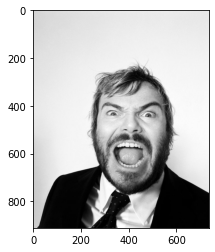

In [9]:
#Working with images from url

img_path = 'https://i.pinimg.com/originals/cd/7c/fa/cd7cfaf5bd6081fc98f5ad56740a5213.jpg'
img = urlToImage(img_path)
height, width, channels = img.shape
rect = (0, 0, width, height)
frame, pred = detect_image(img, rect)

is_mouth_opened = True if pred >= CONFIDENCE_THRESHOLD else False
opened_str = "is opened" if is_mouth_opened else " is closed"
print('Mouth', opened_str, '\nConfidence:', pred)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

Prediction: 1.00; time: 7 ms
Mouth is opened 
Confidence: 1.0


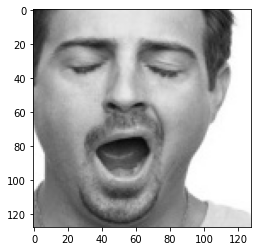

In [11]:
#Working with images from local storage
img = cv2.imread('image.jpg')
#img = urlToImage(img_path)
height, width, channels = img.shape
rect = (0, 0, width, height)
frame, pred = detect_image(img, rect)

is_mouth_opened = True if pred >= CONFIDENCE_THRESHOLD else False
opened_str = "is opened" if is_mouth_opened else " is closed"
print('Mouth', opened_str, '\nConfidence:', pred)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [24]:
#Finding Mouth on video 


cap = cv2.VideoCapture('Test_video.mp4')
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")
   
# Read until video is completed

while(cap.isOpened()):
  # Capture frame-by-frame
    ret, img = cap.read()
    height, width, channels = img.shape
    rect = (0, 0, width, height)
    frame, pred = detect_image(img, rect)


    is_mouth_opened = True if pred >= CONFIDENCE_THRESHOLD else False
    opened_str = "is opened" if is_mouth_opened else "is closed"

    text = 'Mouth '+ opened_str
    print('\nConfidence:', pred)

    coordinates = (100,100)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255,0,255)
    thickness = 2
    image = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)





    print('Mouth', opened_str, '\nConfidence:', pred)
      # Display the resulting frame

    cv2.imshow('Frame', image)

    # Press Q on keyboard to  exit
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

# When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()




Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 15 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 0.63; time: 0 ms

Confidence: 0.63
Mouth is opened 
Confidence: 0.63
Prediction: 1.00; time: 7 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 0.09; time: 0 ms

Confidence: 0.09
Mouth  is closed 
Confidence: 0.09
Prediction: 0.93; time: 0 ms

Confidence: 0.93
Mouth is opened 
Confidence: 0.93
Prediction: 0.98; time: 0 ms

Confidence: 0.98
Mouth is opened 
Confidence: 0.98
Prediction: 0.00; time: 0 ms

Confidence: 

Prediction: 1.00; time: 7 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 22 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 6 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 5 ms

Confidence: 1.0
Mouth

Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 54 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 16 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mout

Prediction: 0.00; time: 10 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 16 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.03; time: 0 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.04; time: 0 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.25; time: 0 ms

Confidence: 0.25
Mouth  is closed 
Confidence: 0.25
Prediction: 0.65; time: 0 ms

Confidence: 0.65
Mouth is opened 
Confidence: 0.65
Prediction: 0.00; time: 15 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.56; time: 0 ms

Confidence: 0.56
Mouth is opened 
Confidence: 0.56
Prediction: 0.42; time: 0 ms

Confidence: 0.42
Mouth is opened 
Confidence: 0.42
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

C

AttributeError: 'NoneType' object has no attribute 'shape'

In [25]:
#Finding Mouth in real time


cap = cv2.VideoCapture(0)
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video  file")
   
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
    ret, img = cap.read()
    height, width, channels = img.shape
    rect = (0, 0, width, height)
    frame, pred = detect_image(img, rect)



    is_mouth_opened = True if pred >= CONFIDENCE_THRESHOLD else False
    opened_str = "is opened" if is_mouth_opened else " is closed"

    text = 'Mouth '+ opened_str
    print('\nConfidence:', pred)

    coordinates = (100,100)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255,0,255)
    thickness = 2
    image = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)

    print('Mouth', opened_str, '\nConfidence:', pred)
      # Display the resulting frame

    cv2.imshow('Frame', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

   
# When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()


Prediction: 0.02; time: 16 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.07; time: 8 ms

Confidence: 0.07
Mouth  is closed 
Confidence: 0.07
Prediction: 0.07; time: 4 ms

Confidence: 0.07
Mouth  is closed 
Confidence: 0.07
Prediction: 0.01; time: 2 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.04; time: 6 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.04; time: 1 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.04; time: 0 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.01; time: 1 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 5 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.04; time: 8 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.01; time: 2 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 1 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.0

Prediction: 0.07; time: 5 ms

Confidence: 0.07
Mouth  is closed 
Confidence: 0.07
Prediction: 0.07; time: 3 ms

Confidence: 0.07
Mouth  is closed 
Confidence: 0.07
Prediction: 0.03; time: 8 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.46; time: 1 ms

Confidence: 0.46
Mouth is opened 
Confidence: 0.46
Prediction: 0.46; time: 1 ms

Confidence: 0.46
Mouth is opened 
Confidence: 0.46
Prediction: 0.22; time: 1 ms

Confidence: 0.22
Mouth  is closed 
Confidence: 0.22
Prediction: 0.22; time: 6 ms

Confidence: 0.22
Mouth  is closed 
Confidence: 0.22
Prediction: 0.34; time: 6 ms

Confidence: 0.34
Mouth  is closed 
Confidence: 0.34
Prediction: 0.23; time: 8 ms

Confidence: 0.23
Mouth  is closed 
Confidence: 0.23
Prediction: 0.23; time: 1 ms

Confidence: 0.23
Mouth  is closed 
Confidence: 0.23
Prediction: 0.03; time: 1 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.13; time: 4 ms

Confidence: 0.13
Mouth  is closed 
Confidence: 0.13
Prediction: 0.13; 

Prediction: 0.06; time: 1 ms

Confidence: 0.06
Mouth  is closed 
Confidence: 0.06
Prediction: 0.17; time: 1 ms

Confidence: 0.17
Mouth  is closed 
Confidence: 0.17
Prediction: 0.17; time: 1 ms

Confidence: 0.17
Mouth  is closed 
Confidence: 0.17
Prediction: 0.39; time: 0 ms

Confidence: 0.39
Mouth  is closed 
Confidence: 0.39
Prediction: 0.22; time: 1 ms

Confidence: 0.22
Mouth  is closed 
Confidence: 0.22
Prediction: 0.22; time: 1 ms

Confidence: 0.22
Mouth  is closed 
Confidence: 0.22
Prediction: 0.64; time: 0 ms

Confidence: 0.64
Mouth is opened 
Confidence: 0.64
Prediction: 0.64; time: 1 ms

Confidence: 0.64
Mouth is opened 
Confidence: 0.64
Prediction: 0.64; time: 7 ms

Confidence: 0.64
Mouth is opened 
Confidence: 0.64
Prediction: 0.56; time: 1 ms

Confidence: 0.56
Mouth is opened 
Confidence: 0.56
Prediction: 0.31; time: 5 ms

Confidence: 0.31
Mouth  is closed 
Confidence: 0.31
Prediction: 0.31; time: 0 ms

Confidence: 0.31
Mouth  is closed 
Confidence: 0.31
Prediction: 0.31; ti

Prediction: 0.27; time: 3 ms

Confidence: 0.27
Mouth  is closed 
Confidence: 0.27
Prediction: 0.27; time: 0 ms

Confidence: 0.27
Mouth  is closed 
Confidence: 0.27
Prediction: 0.02; time: 1 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.00; time: 1 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.97; time: 1 ms

Confidence: 0.97
Mouth is opened 
Confidence: 0.97
Prediction: 0.97; time: 5 ms

Confidence: 0.97
Mouth is opened 
Confidence: 0.97
Prediction: 0.97; time: 6 ms

Confidence: 0.97
Mouth is opened 
Confidence: 0.97
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 0.99; time: 0 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 1 ms

Con

Prediction: 0.18; time: 6 ms

Confidence: 0.18
Mouth  is closed 
Confidence: 0.18
Prediction: 0.18; time: 1 ms

Confidence: 0.18
Mouth  is closed 
Confidence: 0.18
Prediction: 0.33; time: 0 ms

Confidence: 0.33
Mouth  is closed 
Confidence: 0.33
Prediction: 0.33; time: 6 ms

Confidence: 0.33
Mouth  is closed 
Confidence: 0.33
Prediction: 0.34; time: 0 ms

Confidence: 0.34
Mouth  is closed 
Confidence: 0.34
Prediction: 0.44; time: 4 ms

Confidence: 0.44
Mouth is opened 
Confidence: 0.44
Prediction: 0.44; time: 6 ms

Confidence: 0.44
Mouth is opened 
Confidence: 0.44
Prediction: 0.30; time: 5 ms

Confidence: 0.3
Mouth  is closed 
Confidence: 0.3
Prediction: 0.30; time: 7 ms

Confidence: 0.3
Mouth  is closed 
Confidence: 0.3
Prediction: 0.30; time: 8 ms

Confidence: 0.3
Mouth  is closed 
Confidence: 0.3
Prediction: 0.11; time: 8 ms

Confidence: 0.11
Mouth  is closed 
Confidence: 0.11
Prediction: 0.07; time: 1 ms

Confidence: 0.07
Mouth  is closed 
Confidence: 0.07
Prediction: 0.05; time: 

Prediction: 0.92; time: 4 ms

Confidence: 0.92
Mouth is opened 
Confidence: 0.92
Prediction: 0.92; time: 3 ms

Confidence: 0.92
Mouth is opened 
Confidence: 0.92
Prediction: 0.63; time: 2 ms

Confidence: 0.63
Mouth is opened 
Confidence: 0.63
Prediction: 0.63; time: 0 ms

Confidence: 0.63
Mouth is opened 
Confidence: 0.63
Prediction: 0.46; time: 3 ms

Confidence: 0.46
Mouth is opened 
Confidence: 0.46
Prediction: 0.46; time: 2 ms

Confidence: 0.46
Mouth is opened 
Confidence: 0.46
Prediction: 0.14; time: 0 ms

Confidence: 0.14
Mouth  is closed 
Confidence: 0.14
Prediction: 0.14; time: 0 ms

Confidence: 0.14
Mouth  is closed 
Confidence: 0.14
Prediction: 0.56; time: 0 ms

Confidence: 0.56
Mouth is opened 
Confidence: 0.56
Prediction: 0.56; time: 0 ms

Confidence: 0.56
Mouth is opened 
Confidence: 0.56
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 0.99; time: 0 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 0 ms

Prediction: 0.72; time: 0 ms

Confidence: 0.72
Mouth is opened 
Confidence: 0.72
Prediction: 0.72; time: 0 ms

Confidence: 0.72
Mouth is opened 
Confidence: 0.72
Prediction: 0.20; time: 0 ms

Confidence: 0.2
Mouth  is closed 
Confidence: 0.2
Prediction: 0.20; time: 3 ms

Confidence: 0.2
Mouth  is closed 
Confidence: 0.2
Prediction: 0.42; time: 0 ms

Confidence: 0.42
Mouth is opened 
Confidence: 0.42
Prediction: 0.42; time: 3 ms

Confidence: 0.42
Mouth is opened 
Confidence: 0.42
Prediction: 0.40; time: 0 ms

Confidence: 0.4
Mouth is opened 
Confidence: 0.4
Prediction: 0.40; time: 3 ms

Confidence: 0.4
Mouth is opened 
Confidence: 0.4
Prediction: 0.75; time: 2 ms

Confidence: 0.75
Mouth is opened 
Confidence: 0.75
Prediction: 0.75; time: 0 ms

Confidence: 0.75
Mouth is opened 
Confidence: 0.75
Prediction: 0.31; time: 0 ms

Confidence: 0.31
Mouth  is closed 
Confidence: 0.31
Prediction: 0.31; time: 0 ms

Confidence: 0.31
Mouth  is closed 
Confidence: 0.31
Prediction: 0.47; time: 4 ms

Co

Prediction: 0.97; time: 0 ms

Confidence: 0.97
Mouth is opened 
Confidence: 0.97
Prediction: 0.97; time: 3 ms

Confidence: 0.97
Mouth is opened 
Confidence: 0.97
Prediction: 0.95; time: 0 ms

Confidence: 0.95
Mouth is opened 
Confidence: 0.95
Prediction: 0.95; time: 0 ms

Confidence: 0.95
Mouth is opened 
Confidence: 0.95
Prediction: 0.99; time: 0 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 3 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 1 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 5 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.96; time: 1 ms

Confidence: 0.96
Mouth is opened 
Confidence: 0.96
Prediction: 0.96; time: 0 ms

Confidence: 0.96
Mouth is opened 
Confidence: 0.96
Prediction: 0.99; time: 4 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 3 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 1.00; time: 8 ms

Prediction: 0.01; time: 3 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.20; time: 19 ms

Confidence: 0.2
Mouth  is closed 
Confidence: 0.2
Prediction: 0.20; time: 1 ms

Confidence: 0.2
Mouth  is closed 
Confidence: 0.2
Prediction: 0.16; time: 0 ms

Confidence: 0.16
Mouth  is closed 
Confidence: 0.16
Prediction: 0.04; time: 3 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.04; time: 19 ms

Confidence: 0.04
Mouth  is closed 
Confidence: 0.04
Prediction: 0.01; time: 3 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 2 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.00; time: 41 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 1 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.37; time: 2 ms

Confidence: 0.37
Mouth  is closed 
Confidence: 0.37
Prediction: 0.19; tim

Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 3 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 2 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 0.70; time: 2 ms

Confidence: 0.7
Mouth is opened 
Confidence: 0.7
Prediction: 0.70; time: 4 ms

Confidence: 0.7
Mouth is opened 
Confidence: 0.7
Prediction: 0.99; time: 1 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.99; time: 0 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.97; time: 0 ms

Confidence: 0.97
M

Prediction: 0.03; time: 4 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.03; time: 0 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.01; time: 58 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 1 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 4 m

Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.08; time: 15 ms

Confidence: 0.08
Mouth  is closed 
Confidence: 0.08
Prediction: 0.14; time: 2 ms

Confidence: 0.14
Mouth  is closed 
Confidence: 0.14
Prediction: 0.40; time: 0 ms

Confidence: 0.4
Mouth is opened 
Confidence: 0.4
Prediction: 0.27; time: 0 ms

Confidence: 0.27
Mouth  is closed 
Confidence: 0.27
Prediction: 0.02; time: 23 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.02; time: 40 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.03; time: 10 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.10; time: 0 ms

Confidence: 0.1
Mouth  is closed 
Confidence: 0.1
Prediction: 0.34; time: 4 ms

Confidence: 0.34
Mouth  is closed 
Confidence: 0.34
Prediction: 0.17; time: 0 ms

Confidence: 0.17
Mouth  is closed 
Confidence: 0.17
Prediction: 0.38; time: 19 ms

Confidence: 0.38
Mouth  is closed 
Confidence: 0.38
Prediction: 0.55

Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 6 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: -0.00; time: 0 ms

Confidence: -0.0
Mouth  is closed 
Confidence: -0.0
Prediction: 0.00; time: 2 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confide

Prediction: 0.00; time: 7 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 1 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 3 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 10 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 18 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.02; time: 0 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.04; time: 0 ms

Confid

Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 28 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 5 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidenc

Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 3 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 1.00; time: 0 ms

Confidence: 1.0
Mouth is opened 
Confidence: 1.0
Prediction: 0.99; time: 0 ms

Confidence: 0.99
Mouth is opened 
Confidence: 0.99
Prediction: 0.33; time: 0 ms

Confidence: 0.33
Mouth  is closed 
Confidence: 0.33
Prediction: 0.00; time: 3 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence

Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 7 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 3 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence

Prediction: 0.44; time: 7 ms

Confidence: 0.44
Mouth is opened 
Confidence: 0.44
Prediction: 0.11; time: 2 ms

Confidence: 0.11
Mouth  is closed 
Confidence: 0.11
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 4 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.02; time: 0 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.09; time: 0 ms

Confidence: 0.09
Mouth  is closed 
Confidence: 0.09
Prediction: 0.33; time: 0 ms

Confidence: 0.33
Mouth  is closed 
Confidence: 0.33
Prediction: 0.33; time: 0 ms

Confidence: 0.33
Mouth  is closed 
Confidence: 0.33
Prediction: 0.01; time: 19 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.00

Prediction: 0.68; time: 0 ms

Confidence: 0.68
Mouth is opened 
Confidence: 0.68
Prediction: 0.69; time: 4 ms

Confidence: 0.69
Mouth is opened 
Confidence: 0.69
Prediction: 0.39; time: 0 ms

Confidence: 0.39
Mouth  is closed 
Confidence: 0.39
Prediction: 0.77; time: 0 ms

Confidence: 0.77
Mouth is opened 
Confidence: 0.77
Prediction: 0.71; time: 0 ms

Confidence: 0.71
Mouth is opened 
Confidence: 0.71
Prediction: 0.42; time: 0 ms

Confidence: 0.42
Mouth is opened 
Confidence: 0.42
Prediction: 0.16; time: 4 ms

Confidence: 0.16
Mouth  is closed 
Confidence: 0.16
Prediction: 0.34; time: 0 ms

Confidence: 0.34
Mouth  is closed 
Confidence: 0.34
Prediction: 0.25; time: 0 ms

Confidence: 0.25
Mouth  is closed 
Confidence: 0.25
Prediction: 0.18; time: 0 ms

Confidence: 0.18
Mouth  is closed 
Confidence: 0.18
Prediction: 0.18; time: 0 ms

Confidence: 0.18
Mouth  is closed 
Confidence: 0.18
Prediction: 0.01; time: 8 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; tim

Prediction: 0.07; time: 8 ms

Confidence: 0.07
Mouth  is closed 
Confidence: 0.07
Prediction: 0.00; time: 7 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.00; time: 4 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.00; time: 8 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 19 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 6 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 10 ms

Co

Prediction: 0.01; time: 4 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.00; time: 1 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 1 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.06; time: 4 ms

Confidence: 0.06
Mouth  is closed 
Confidence: 0.06
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 19 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: -0.00; time: 4 ms

Co

Prediction: 0.00; time: 3 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 0 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.00; time: 8 ms

Confidence: 0.0
Mouth  is closed 
Confidence: 0.0
Prediction: 0.01; time: 2 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 16 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.03; time: 1 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.01; time: 0 ms

Confidence: 0.01
Mouth  is closed 
Confidence: 0.01
Prediction: 0.02; time: 0 ms

Confidence: 0.02
Mouth  is closed 
Confidence: 0.02
Prediction: 0.03; time: 4 ms

Confidence: 0.03
Mouth  is closed 
Confidence: 0.03
Prediction: 0.05; time:

As per the task provided, I have done the task of mouth  detection.

Well, I haven't added the filter in realtime because on google collab it not support the camera as input.

Moreover, I have the program with mouth cordinated to put filter on that, but that needed training and a good time.

Let me know if you want that then I can provide with that in the assignment too.


Thank you,
Aman India.

In [12]:
Aman 